In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

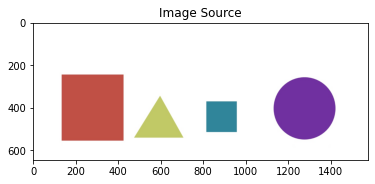

In [2]:
# Let's load a simple image with 3 black squares
image = cv2.imread('../images/sq.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Source')
plt.show()

Number of contours found = 4


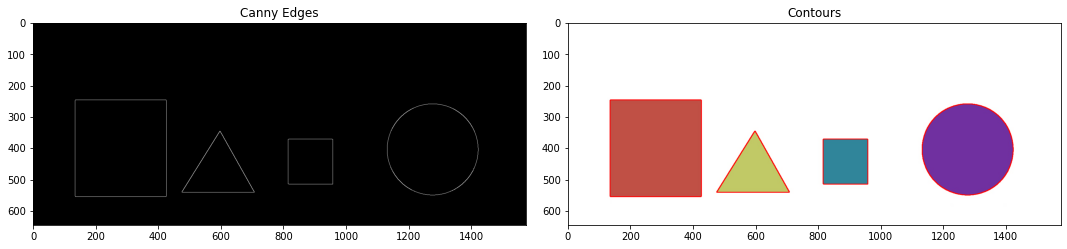

In [3]:
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 15))
fig.tight_layout()
 
# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
axs[0].imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
axs[0].set_title('Canny Edges')
# cv2.imwrite('canny_edges.jpg', edged)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,0,255), 2)
axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Contours')
# cv2.imwrite('contour_image.jpg', image)

plt.show()

In [4]:
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [5]:
# Print the areas of the contours before sorting
print("Contor Areas before sorting") 
print(get_contour_areas(contours))

Contor Areas before sorting
[20587.5, 22901.5, 66579.5, 90222.0]


In [6]:
# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(get_contour_areas(sorted_contours))

[90222.0, 66579.5, 22901.5, 20587.5]


In [7]:
# Returns center point for each
# contour object in an image
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)

In [8]:
test_image = image.copy()

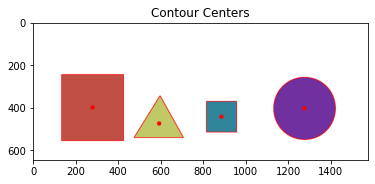

In [9]:
for (i, c) in enumerate(contours):
    label_contour_center(test_image, c)
    
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Centers')

plt.show()

### We can also order contours according to their X or Y Coordinates.
First we need to find x and y coordinates,
it is a similar process with "label_contour_center" function



In [10]:
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

In [11]:
def display_left_to_right_contour(i,image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Left to Right Contour'); plt.show()
    image_name = "output_shape_number_" + str(i) + ".jpg"
    print(image_name)
    return image_name

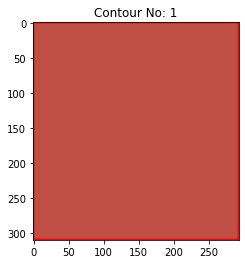

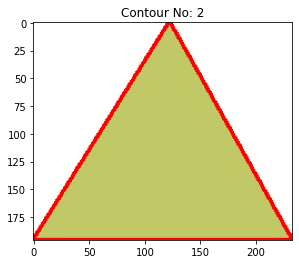

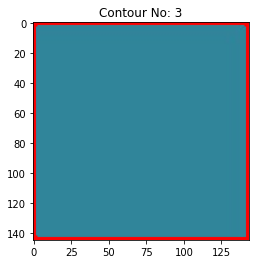

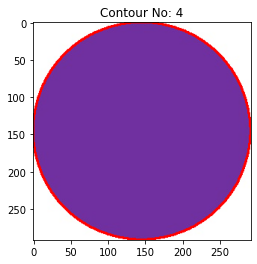

In [12]:
# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    (x, y, w, h) = cv2.boundingRect(c)  
    #Cropping the contour area, since for loop is used, 
    #all contours will be cropped
    cropped_contour = image[y:y + h, x:x + w]
    plt.imshow(cv2.cvtColor(cropped_contour, cv2.COLOR_BGR2RGB))
    plt.title('Contour No: ' + str(i+1)) 
    plt.show()
    
    #Saving the cropped images
    cv2.imwrite("contour_no_"+str(i+1)+".jpg", cropped_contour)
    
